In [1]:
import mlrose_hiive
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt

Randimized Hill Climb
Randimized Hill Climb Time:  429.708964078
28.0


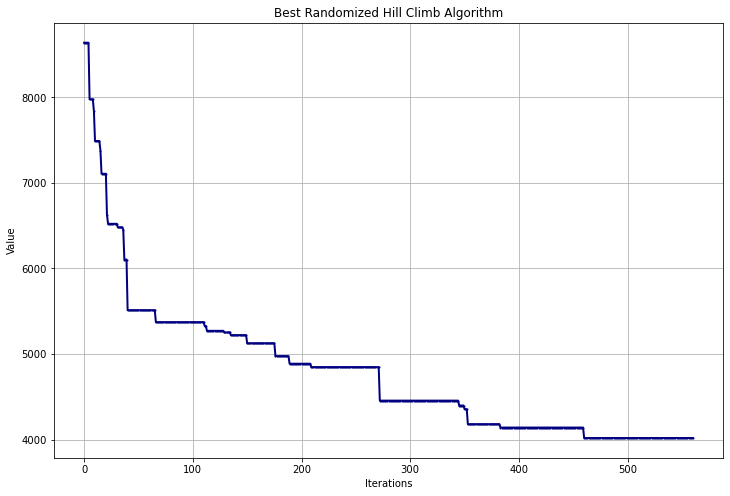

The average value of the fitness function was: 4821.140568210846
The min value of the fitness function was: 4017.332434551344
The max run time of the algorithm was: 429.563025371
Simulated Annealing
Simulated Annealing Time:  7.632567283000014
The average value of the fitness function was: 4662.258198774822
The min value of the fitness function was: 4101.769800472888
The max run time of the algorithm was: 5.15566536099999
The average time for temperature 1 was: 0.08432993499999952
The average time for temperature 10000 was: 0.4474668750000035
The average time for temperature 10000000000 was: 3.2244355394999786
10000


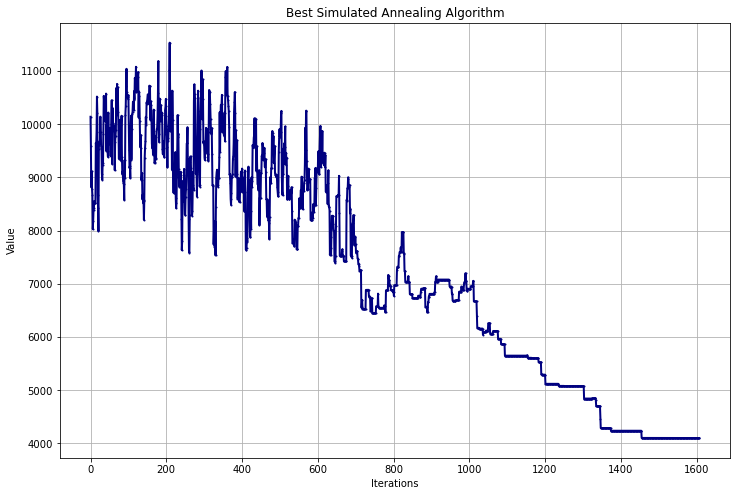

Genetic Algorithm
Genetic Algorithm Time:  28.77772893499997
The average value of the fitness function was: 4289.971234005317
The min value of the fitness function was: 3982.39036615328
The max run time of the algorithm was: 5.669069579999984
Mutation Rate
0.10    4252.024014
0.25    4544.569881
0.50    4073.319806
Name: Fitness, dtype: float64
Population Size
50     4416.086015
100    4278.829309
200    4174.998379
Name: Fitness, dtype: float64
Population Size
50     2.115574
100    2.504890
200    4.958983
Name: Time, dtype: float64
MIMIC
MIMIC Time:  128.83097472000003
The average value of the fitness function was: 6790.760306038976
The min value of the fitness function was: 5638.289613500472
The max run time of the algorithm was: 26.31587148699998
Keep Percent
0.25    6943.484291
0.50    6844.620389
0.75    6584.176238
Name: Fitness, dtype: float64
Population Size
50     7610.169786
100    6853.441050
200    5908.670083
Name: Fitness, dtype: float64
Population Size
50      6.645904

In [2]:
def print_optimal_info_rhc(randomized_hill_climb_graph):
    optimal_index = randomized_hill_climb_graph.Fitness.idxmin()
    optimal_specific_algorithm = randomized_hill_climb_graph.iloc[optimal_index].current_restart
    optimal_figure = randomized_hill_climb_graph.loc[randomized_hill_climb_graph.current_restart == optimal_specific_algorithm, :]
    optimal_figure.reset_index(inplace=True)
    print(optimal_specific_algorithm)

    return optimal_figure

def print_optimal_info_sa(randomized_hill_climb_graph):
    optimal_index = randomized_hill_climb_graph.Fitness.idxmin()
    optimal_specific_algorithm = randomized_hill_climb_graph.iloc[optimal_index].Temperature
    optimal_figure = randomized_hill_climb_graph.loc[randomized_hill_climb_graph.Temperature == optimal_specific_algorithm, :]
    optimal_figure.reset_index(inplace=True)
    print(optimal_specific_algorithm)

    return optimal_figure

def plot_figure(optimal_figure, title):
    plot = optimal_figure.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, figsize=(12,8), grid=1, title=title)
    plot.set_xlabel("Iterations")
    plot.set_ylabel("Value")
    plt.show()

def performance(info):
    last_iters = info[info.Iteration != 0].reset_index()
    print(f'The average value of the fitness function was: {last_iters.Fitness.mean()}')
    print(f'The min value of the fitness function was: {last_iters.Fitness.min()}')
    print(f'The max run time of the algorithm was: {last_iters.Time.max()}')

    return last_iters

def randomized_hill_climb(problem):
    print('Randimized Hill Climb')
    start = timeit.default_timer()
    c_randomized_hill_climb = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                           iteration_list=[10000],
                                           seed=42, max_attempts=100, 
                                           restart_list=[100])
    randomized_hill_climb_info, randomized_hill_climb_graph = c_randomized_hill_climb.run()
    stop = timeit.default_timer()
    print('Randimized Hill Climb Time: ', stop - start)  
    
    optimal_figure = print_optimal_info_rhc(randomized_hill_climb_graph)
    
    plot_figure(optimal_figure, 'Best Randomized Hill Climb Algorithm')

    performance(randomized_hill_climb_info)
    
def simulated_annealing(problem, temperature_list):
    print('Simulated Annealing')
    start = timeit.default_timer()
    
    c_simulated_annealing = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                               iteration_list=[100000],
                               temperature_list=temperature_list,
                               decay_list=[mlrose_hiive.ExpDecay,
                                           mlrose_hiive.GeomDecay],
                               seed=42, max_attempts=100)

    simulated_annealing_info, simulated_annealing_graph = c_simulated_annealing.run()
    
    stop = timeit.default_timer()
    print('Simulated Annealing Time: ', stop - start)  
    
    last_iters = performance(simulated_annealing_info)

    for temp in temperature_list:
        print(f'The average time for temperature {temp} was: {last_iters.loc[last_iters.schedule_init_temp == temp, "Time"].mean()}')

    
    optimal_figure = print_optimal_info_sa(simulated_annealing_graph)

    plot_figure(optimal_figure, 'Best Simulated Annealing Algorithm')



def genetic_algorithm(problem, population_sizes, mutation_rates):
    print('Genetic Algorithm')
    start = timeit.default_timer()
    
    c_genetic_alogrithm = mlrose_hiive.GARunner(problem=problem,
                              experiment_name="GA_Exp",
                              seed=42,
                              iteration_list=[100000],
                              max_attempts=100,
                              population_sizes=population_sizes,
                              mutation_rates=mutation_rates)
    genetic_algorithm_info, genetic_algorithm_graph = c_genetic_alogrithm.run()
    
    stop = timeit.default_timer()
    print('Genetic Algorithm Time: ', stop - start)  
    
    
    last_iters = performance(genetic_algorithm_info)
    print(last_iters.groupby("Mutation Rate").Fitness.mean())
    print(last_iters.groupby("Population Size").Fitness.mean())
    print(last_iters.groupby("Population Size").Time.mean())
    
    
def mimic(problem, population_sizes, keep_percent_list):
    print('MIMIC')
    start = timeit.default_timer()
    
    
    c_mimic = mlrose_hiive.MIMICRunner(problem=problem,
                      experiment_name="MMC_Exp",
                      seed=42,
                      iteration_list=[100000],
                      max_attempts=100,
                      population_sizes=population_sizes,
                      keep_percent_list=keep_percent_list,
                      use_fast_mimic=True)

    mimic_info, mimic_graph = c_mimic.run()
    
    
    stop = timeit.default_timer()
    print('MIMIC Time: ', stop - start) 
    
    last_iters = performance(mimic_info)
    print(last_iters.groupby("Keep Percent").Fitness.mean())
    print(last_iters.groupby("Population Size").Fitness.mean())
    print(last_iters.groupby("Population Size").Time.mean())


if __name__ == "__main__":
    np.random.seed(42)
    coords = np.random.randint(0, 1000, (20, 2))
    coords_list = list(coords)
    fitness_cust = mlrose_hiive.TravellingSales(coords = coords_list)
    problem = mlrose_hiive.TSPOpt(length = 20, fitness_fn = fitness_cust, maximize = False)
    
    randomized_hill_climb(problem)
    simulated_annealing(problem, temperature_list = [1, 10000, 10000000000])
    genetic_algorithm(problem, population_sizes=[50, 100, 200], mutation_rates=[0.1, 0.25, 0.5])
    mimic(problem, population_sizes=[50, 100, 200], keep_percent_list=[0.25, 0.5, 0.75])